# AM3strokes

#### Project description:
_A 3 strokes vertical apparent motion is presented left or right of fixation. <br />
Participants are instructed to saccadeto saccade to the perceived last stroke._

#### Hypothesis: 
_Participants mislocalize the 3rd stroke in the direction of the motion_

#### Eye movement data analysis:

- [x] Saccade analysis output graph
- [x] Saccade parameter graph
- [ ] Saccade landing graph

#### PLAN :
- Saccade analysis output graph (2 rows x 1 column) = DONE
- Saccade parameters (2 rows x 4 columns)
- Saccade trajectories and landing (2 rows x 2 columns)
    - Row 1: main saccade & corrective saccades  + legend saccade direction
    - Row 2: main saccade & corrective saccades  + legend trial sequence
    - Column 1: Screen coordinates y vs. screen coordinates x + plot main saccade position onset / offset (raw data)
    - Column 2: Screen coordinates y vs. screen coordinates x + plot main saccade position onset / offset (corrected for jitter)

In [14]:
# Imports
import os
import numpy as np
import pandas as pd
import ipdb

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plot_utils import plotly_template
import plotly.express as px

In [15]:
# Define folders
base_dir = '/home/mszinte/codes/am3strokes/'
data_dir = '/home/mszinte/codes/am3strokes/data'
subject = 'sub-02'
fig_dir = '{data_dir}/{subject}/figures'.format(data_dir=data_dir, subject=subject)

In [16]:
# Save dataframe
df_all = pd.read_csv('{data_dir}/{subject}/add/{subject}_task-AM3strokes_data.csv'.format(data_dir=data_dir,subject=subject)) 

#### Saccade analysis output graph

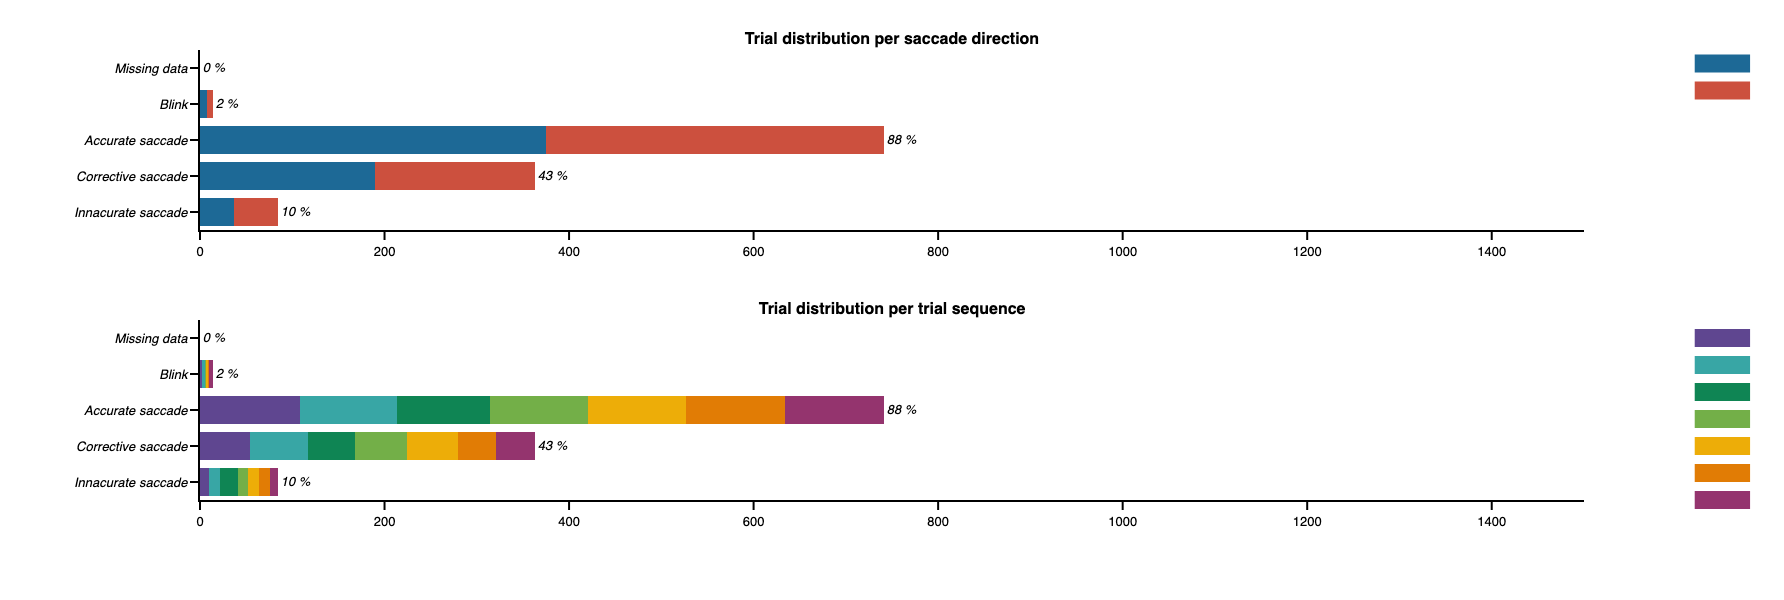

In [17]:
# general figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Helvetica',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

# figure specific settings
x_range = [0,1500]
colors_panel = px.colors.qualitative.Prism
subplot_titles = ('<b>Trial distribution per saccade direction<b>','<b>Trial distribution per trial sequence<b>')
analysis_crit = ['<i>Missing data<i>', '<i>Blink<i>', '<i>Accurate saccade<i>', '<i>Corrective saccade<i>', '<i>Innacurate saccade<i>']
analysis_crit_df = ['miss_time_trial','blink_trial','main_sac_trial','cor_sac_trial','innacurate_sac_trial']
x_label='Trials'
tss = ['Steady 1', 'Steady 2', 'Steady 3', 'Steady 4', 'Steady 5', 'Motion 1-2-3', 'Motion 5-4-3']
sds = ['Left saccades', 'Right saccades']
ts_cols = [colors_panel[0], colors_panel[2], colors_panel[3], colors_panel[4], colors_panel[5], colors_panel[6], colors_panel[8]]
sd_cols = [colors_panel[1], colors_panel[7]]
x_legend = 1.15
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# subplot settings
rows, cols = 2, 1
fig_height, fig_width = 600,800
column_widths,row_heights = [1],[1,1]
sb_specs = [[{}],[{}]]
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights, shared_yaxes=True, subplot_titles=subplot_titles)

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Bar(y=analysis_crit, x=df_all.loc[(df_all.saccade_direction == sd_num+1)][analysis_crit_df].sum(), 
                            orientation='h', name=sd, marker_color=sd_cols[sd_num]),row=1, col=1)
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend-0.05-rad_leg/2, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.05+rad_leg/2, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)
    
# annotation value
for num_crit, crit_name in enumerate(analysis_crit_df):
    fig.add_annotation(x=df_all[crit_name].sum(), y=num_crit, text='<i>{:1.0f} %<i>'.format(df_all[crit_name].mean()*100), 
                       showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', row=1, col=1)

# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    fig.append_trace(go.Bar(y=analysis_crit, x=df_all.loc[(df_all.trial_sequence == ts_num+1)][analysis_crit_df].sum(), 
                            orientation='h', name=ts, marker_color=ts_cols[ts_num]),row=2, col=1)
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                  x0=x_legend-0.05-rad_leg/2, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.05+rad_leg/2, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)

for num_crit, crit_name in enumerate(analysis_crit_df):
    fig.add_annotation(x=df_all[crit_name].sum(), y=num_crit, text='<i>{:1.0f} %<i>'.format(df_all[crit_name].mean()*100), 
                       showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', row=2, col=1)


# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=x_range, row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], autorange="reversed", row=row+1, col=col+1)
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=200, margin_r=200, margin_t=50, margin_b=100, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)    
fig.write_image('{}/{}_trial_dist.pdf'.format(fig_dir, subject))

#### Saccade parameter graph

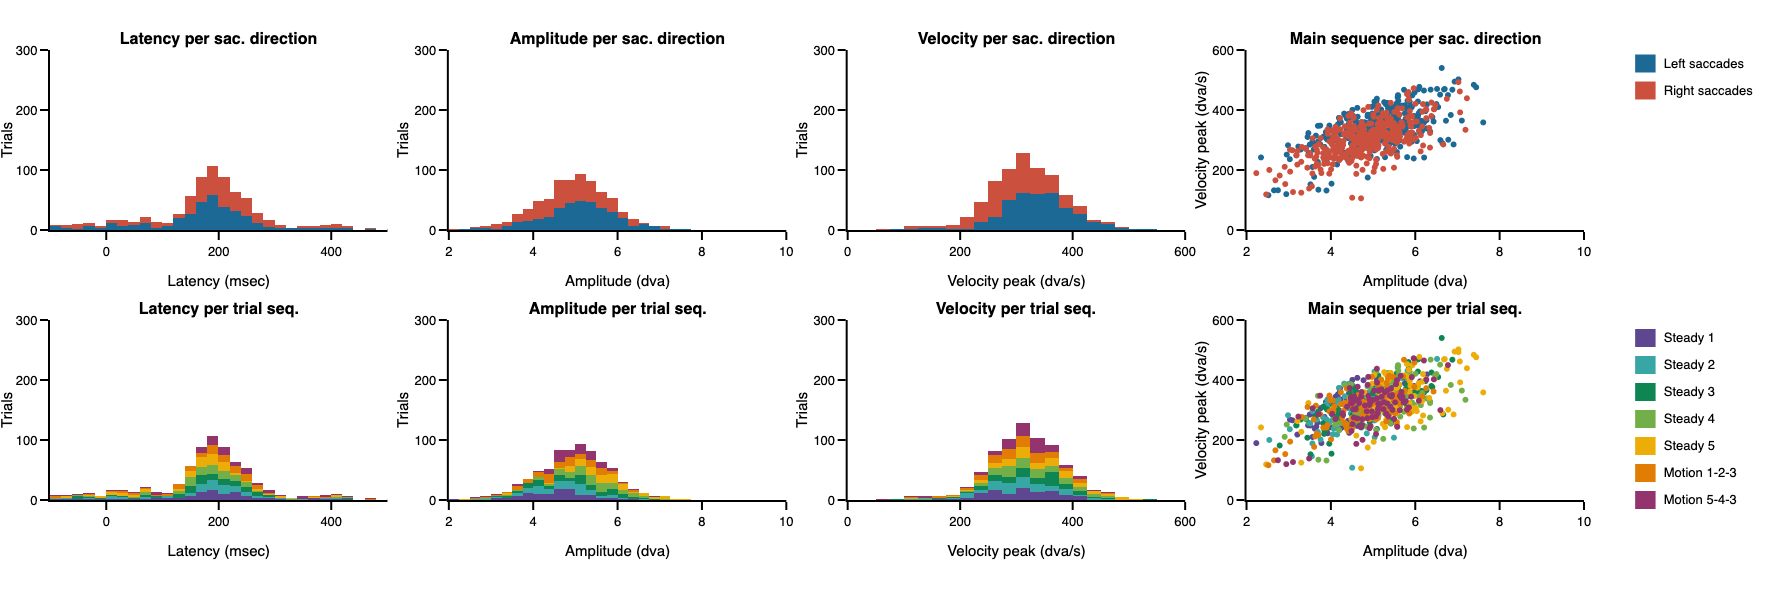

In [18]:
# figure specific settings
subplot_titles = ('<b>Latency per sac. direction<b>', '<b>Amplitude per sac. direction<b>', '<b>Velocity per sac. direction<b>', '<b>Main sequence per sac. direction<b>',
                  '<b>Latency per trial seq.<b>', '<b>Amplitude per trial seq.<b>', '<b>Velocity per trial seq.<b>', '<b>Main sequence per trial seq.<b>',)
# subplot settings
rows, cols = 2, 4
leg_mergin = 200
fig_height, fig_width = 600,350*4+leg_mergin
column_widths,row_heights = [1,1,1,1],[1,1]
sb_specs = [[{},{},{},{}],[{},{},{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.04, 
                    column_widths=column_widths, row_heights=row_heights, subplot_titles=subplot_titles)

x_legend = 1.05
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_lat_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 20),row=1, col=1)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_amp_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 0.25),row=1, col=2)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_vpeak_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 25),row=1, col=3)
    fig.append_trace(go.Scatter(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_amp_trial'],
                                y=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_vpeak_trial'],name=sd, mode='markers',marker_color=sd_cols[sd_num]),row=1, col=4)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend-0.01-rad_leg/6, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.01+rad_leg/6, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)

# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_lat_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 20),row=2, col=1)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_amp_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 0.25),row=2, col=2)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_vpeak_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 25),row=2, col=3)
    fig.append_trace(go.Scatter(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_amp_trial'],
                                y=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_vpeak_trial'],name=ts, mode='markers',marker_color=ts_cols[ts_num]),row=2, col=4)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                  x0=x_legend-0.01-rad_leg/6, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.01+rad_leg/6, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)

# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0,300], title='Trials',row=row+1, col=col+1)

fig.layout.update(xaxis_range =[-100,500],  xaxis5_range=[-100,500], 
                  xaxis2_range=[2,10],   xaxis6_range=[2,10],
                  xaxis3_range=[0,600],  xaxis7_range=[0,600],
                  xaxis4_range=[2,10],   xaxis8_range=[2,10],
                  yaxis4_range=[0,600],  yaxis8_range=[0,600],    
                  xaxis_title ='Latency (msec)',        xaxis5_title='Latency (msec)',
                  xaxis2_title='Amplitude (dva)',       xaxis6_title='Amplitude (dva)',
                  xaxis3_title='Velocity peak (dva/s)', xaxis7_title='Velocity peak (dva/s)',
                  xaxis4_title='Amplitude (dva)',       xaxis8_title='Amplitude (dva)',
                  yaxis4_title='Velocity peak (dva/s)', yaxis8_title='Velocity peak (dva/s)',
                 )
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)    
fig.write_image('{}/{}_saccade_dist.pdf'.format(fig_dir, subject))

#### Saccade coordinates

- [x] put stuff in dva
- [x] center figure with smaller range
- [x] put legend
- [x] save the figure
- [ ] put line of fixation/saccade

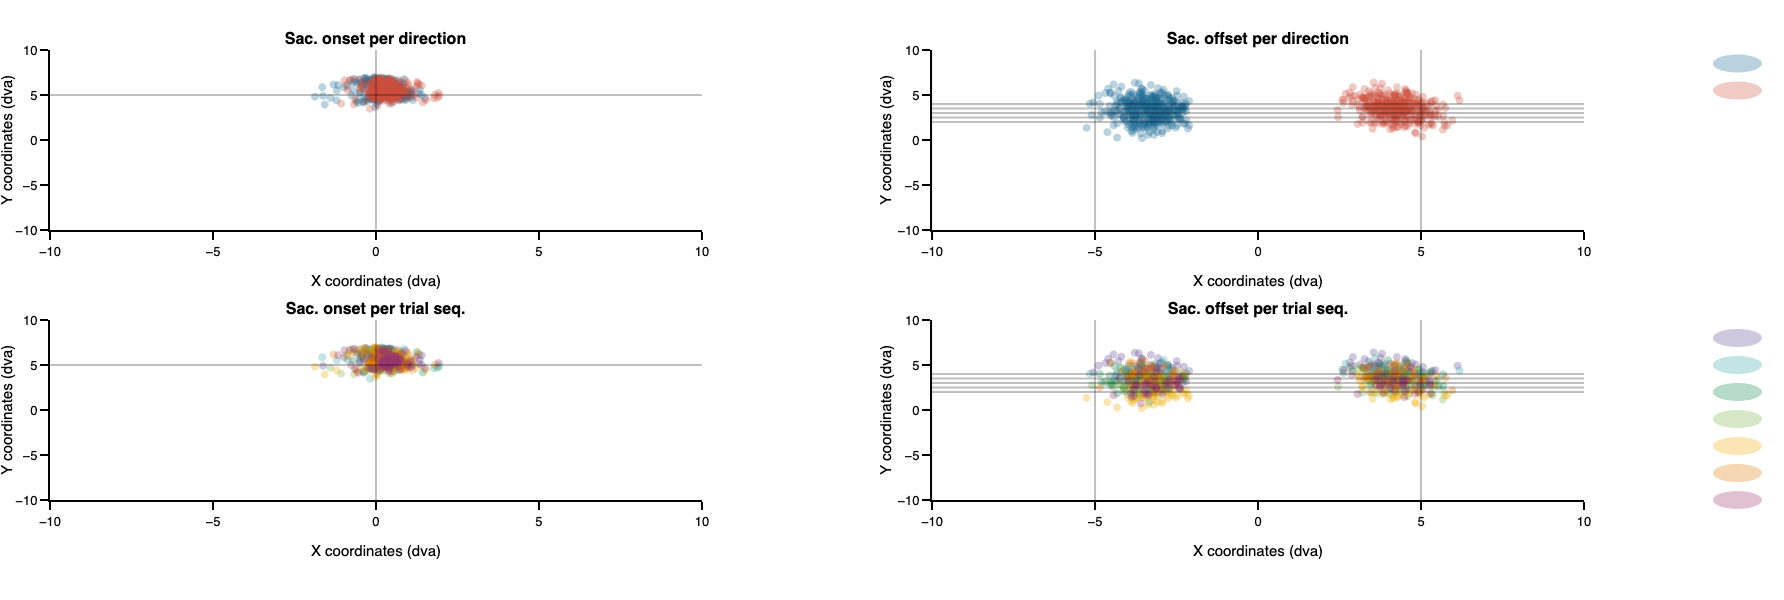

In [36]:
# figure specific settings
subplot_titles = ('<b>Sac. onset per direction<b>', '<b>Sac. offset per direction<b>',
                  '<b>Sac. onset per trial seq.<b>', '<b>Sac. offset per trial seq.<b>',)

# subplot settings
rows, cols = 2, 2
leg_mergin = 200
fig_height, fig_width = 600,300*2+leg_mergin
column_widths,row_heights = [1,1],[1,1]
sb_specs = [[{},{}],[{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.15, 
                    column_widths=column_widths, row_heights=row_heights, subplot_titles=subplot_titles)

x_legend = 1.13
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):

    
    # plot
    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]
    fig.append_trace(go.Scatter(x=df_cond['sac_x_onset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_onset_trial']-df_cond['jitter_y_trial'],
                                name=sd, mode='markers',marker_color=sd_cols[sd_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=1, col=1)
    
    fig.append_trace(go.Scatter(x=df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                name=sd, mode='markers',marker_color=sd_cols[sd_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=1, col=2)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0, opacity=0.3,
                  x0=x_legend-0.03-rad_leg/2.5, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.03+rad_leg/2.5, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)

# ref lines
fig.add_hline(y=5,opacity=0.25, row=1, col=1)
fig.add_vline(x=0,opacity=0.25, row=1, col=1)
fig.add_vline(x=-5, opacity=0.25, row=1, col=2)
fig.add_vline(x=5,  opacity=0.25, row=1, col=2)
fig.add_hline(y=4,  opacity=0.25, row=1, col=2)
fig.add_hline(y=3.5,opacity=0.25, row=1, col=2)
fig.add_hline(y=3,  opacity=0.25, row=1, col=2)
fig.add_hline(y=2.5,opacity=0.25, row=1, col=2)
fig.add_hline(y=2,  opacity=0.25, row=1, col=2)
    
    
# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]
    fig.append_trace(go.Scatter(x=df_cond['sac_x_onset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_onset_trial']-df_cond['jitter_y_trial'],
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=2, col=1)

    fig.append_trace(go.Scatter(x=df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=2, col=2)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                  x0=x_legend-0.03-rad_leg/2.5, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.03+rad_leg/2.5, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)


# ref lines
fig.add_hline(y=5,opacity=0.25, row=2, col=1)
fig.add_vline(x=0,opacity=0.25, row=2, col=1)
fig.add_vline(x=-5, opacity=0.25, row=2, col=2)
fig.add_vline(x=5,  opacity=0.25, row=2, col=2)
fig.add_hline(y=4,  opacity=0.25, row=2, col=2)
fig.add_hline(y=3.5,opacity=0.25, row=2, col=2)
fig.add_hline(y=3,  opacity=0.25, row=2, col=2)
fig.add_hline(y=2.5,opacity=0.25, row=2, col=2)
fig.add_hline(y=2,  opacity=0.25, row=2, col=2)    
    
# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[-10,10], title='X coordinates (dva)', row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[-10,10], title='Y coordinates (dva)',row=row+1, col=col+1)
    
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, barmode='stack', showlegend=False)    
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_saccade_landing.pdf'.format(fig_dir, subject))